In [1]:
import pandas as pd # for reading the csv file
import matplotlib.pyplot as plt # for plotting graphs
import numpy as np # for numerical manipulation

In [2]:
diabetes_csv = pd.read_csv("diabetes.csv") # for reading csv files 

In [3]:
%pylab inline 
"""
-> this is a magic function
-> this is an Ipython command, that allows graphs to be embedded in the notebook.
-> %matplotlib, %pyplot and %pylab wotk the same way only that %pylab imports all needed 
   libraries for graphing using matplotlib
"""

Populating the interactive namespace from numpy and matplotlib


'\n-> this is a magic function\n-> this is an Ipython command, that allows graphs to be embedded in the notebook.\n-> %matplotlib, %pyplot and %pylab wotk the same way only that %pylab imports all needed \n   libraries for graphing using matplotlib\n'

In [4]:
dataset = diabetes_csv # assigning the csv to the dataset variable

In [5]:
dataset.head() # prints the first 5 rows of our csv

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


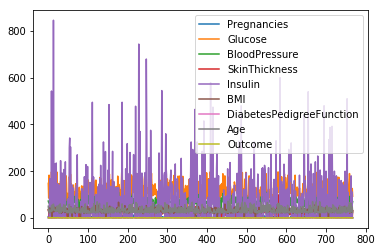

In [6]:
dataset.plot() # this is for plotting our csv data
plt.show() # for plotting in the notebook though it can be oittmed because %pylab inline

## Fix random seed for reproducibility

In [7]:
seed = 7
np.random.seed(seed)

In [8]:
dataset.shape # shows the number of rows and colums

(768, 9)

In [9]:
dataset.dtypes # shows the data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)

In [11]:
pd.set_option('display.width', 200)

In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [13]:
# class distribution
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [14]:
# correlation
dataset.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [15]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Split into input (X) and output (Y) variables

In [16]:
# Prepare Data
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

## Create DNN Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
import os

c:\intelpython3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
model = Sequential()

model.add(Dense(1024, input_dim=8, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))

model.add(Dense(512, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

## Print the model sumarry

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 2,633,729
Trainable params: 2,633,729
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

Wall time: 35 ms


In [21]:
# Save the model according to the conditions
checkpoint = ModelCheckpoint(filepath="diabetes.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
"""
Save the model after every epoch.
monitor: quantity to monitor... either val_acc or val_loss
verbose: verbosity mode, 0 or 1.
save_best_only: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.
mode: one of {auto, min, max}
    --> auto - will infer from the quantity to monitor
    --> min - is only used  when the monitor = 'val_loss'
    --> max - is only used when monitor = 'val_acc'
save_weights_only: if True, then only the model's weights will be saved
                   else, else the full model is saved
period: Interval (number of epochs) between checkpoints.
"""
model.save("diabetes.h5")

#early stopping in the event there is no improvement in val_acc
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
"""
Stop training when a monitored quantity has stopped improving.

monitor: quantity to be monitored.
min_delta: minimum change in the monitored quantity to qualify as an improvement,
           i.e. an absolute change of less than min_delta, will count as no improvement.
patience: number of epochs with no improvement after which training will be stopped.
verbose: verbosity mode.
mode: one of {auto, min, max}. 
    In min mode, training will stop when the quantity monitored has stopped decreasing; 
    in max mode it will stop when the quantity monitored has stopped increasing; 
    in auto mode, the direction is automatically inferred from the name of the monitored quantity.
"""

'\nStop training when a monitored quantity has stopped improving.\n\nmonitor: quantity to be monitored.\nmin_delta: minimum change in the monitored quantity to qualify as an improvement,\n           i.e. an absolute change of less than min_delta, will count as no improvement.\npatience: number of epochs with no improvement after which training will be stopped.\nverbose: verbosity mode.\nmode: one of {auto, min, max}. \n    In min mode, training will stop when the quantity monitored has stopped decreasing; \n    in max mode it will stop when the quantity monitored has stopped increasing; \n    in auto mode, the direction is automatically inferred from the name of the monitored quantity.\n'

### Fit the model

In [22]:
#%%time
model.fit(X, Y, epochs=250, batch_size=10, callbacks = [checkpoint, early])

Epoch 1/250


InternalError: Blas GEMM launch failed : a.shape=(10, 8), b.shape=(8, 1024), m=10, n=1024, k=8
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/Adamax/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_103, dense_1/kernel/read)]]
	 [[Node: metrics/acc/Mean_1/_137 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_677_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "c:\intelpython3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\intelpython3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\intelpython3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\intelpython3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\intelpython3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\intelpython3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\intelpython3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\intelpython3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\intelpython3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\intelpython3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\intelpython3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\intelpython3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\intelpython3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\intelpython3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\intelpython3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\intelpython3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\intelpython3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\intelpython3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\intelpython3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\intelpython3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-9ee8a775a820>", line 3, in <module>
    model.add(Dense(1024, input_dim=8, kernel_initializer='uniform', activation='relu'))
  File "c:\intelpython3\lib\site-packages\keras\models.py", line 497, in add
    layer(x)
  File "c:\intelpython3\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "c:\intelpython3\lib\site-packages\keras\layers\core.py", line 877, in call
    output = K.dot(inputs, self.kernel)
  File "c:\intelpython3\lib\site-packages\keras\backend\tensorflow_backend.py", line 1076, in dot
    out = tf.matmul(x, y)
  File "c:\intelpython3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2122, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "c:\intelpython3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4567, in mat_mul
    name=name)
  File "c:\intelpython3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\intelpython3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "c:\intelpython3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(10, 8), b.shape=(8, 1024), m=10, n=1024, k=8
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/Adamax/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_103, dense_1/kernel/read)]]
	 [[Node: metrics/acc/Mean_1/_137 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_677_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


### Evaluate the model

In [ ]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
